In [27]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [147]:
exps = [
    ["output_q=0.1_a=0.95_p=1_a_ratio=2_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.9_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.99_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4+2"],
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=2", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=10"],
    ["output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=2", "output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=10"],
    ["output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=4","output_q=0.05_a=0.95_p=1_a_ratio=4_r_ratio=4","output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4","output_q=0.5_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_scalability_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4-2measures", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4-4measures"],
]

# exps = [
#     ["output_q=0.1_a=0.95_p=0_a_ratio=2_r_ratio=4", "output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4"],
#     ["output_q=0.1_a=0.9_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.99_p=0_a_ratio=4_r_ratio=4"],
#     ["output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4+2"],
#     ["output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=2", "output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=10"],
#     ["output_q=0.01_a=0.95_p=0_a_ratio=4_r_ratio=2", "output_q=0.01_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.01_a=0.95_p=0_a_ratio=4_r_ratio=10"],
#     ["output_q=0.01_a=0.95_p=0_a_ratio=4_r_ratio=4","output_q=0.05_a=0.95_p=0_a_ratio=4_r_ratio=4","output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4","output_q=0.5_a=0.95_p=0_a_ratio=4_r_ratio=4"],
#     ["output_scalability"],
#     ["output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
# ]

exp_names = [
    "Different Initial Aggregation Ratios",
    "Increasing Error Bound",
    "Differing Step Function",
    "Different Raw Data Factors (10%)",
    "Different Raw Data Factors (1%)",
    "Increasing Initial Query Selectivity",
    "Scalability",
    "Prefetching",
    "SSIM",
    "Different Measures"]

labels = [
    ["Initial Agg. Ratio = 2", "Initial Agg. Ratio = 4"],
    ["Error Bound = 10%", "Error Bound = 5%", "Error Bound = 1%"],
    ["Step = X2", "Step = +2"],
    ["Raw Data Factor = 2", "Raw Data Factor = 4", "Raw Data Factor = 10"],
    ["Raw Data Factor = 2", "Raw Data Factor = 4", "Raw Data Factor = 10"],
    ["Initial Query Selectivity = 1%", "Initial Query Selectivity = 5%", "Initial Query Selectivity = 10%", "Initial Query Selectivity = 50%"],
    ["1M", "2M", "4M", "8M", "16M", "32M", "64M", "128M", "256M", "512M", "1B"],
    ["OFF", "ON"],
    [""],
    ["1", "2", "4"] 
]

labels = [
    ["2", "4"],
    ["10%", "5%", "1%"],
    ["X2", "+2"],
    ["2", "4", "10"],
    ["2", "4", "10"],
    ["1%", "5%", "10%", "50%"],
    ["1M", "2M", "4M", "8M", "16M", "32M", "64M", "128M", "256M", "512M", "1B"],
    ["OFF", "ON"],
    [""],
    ["1", "2", "4"] 
]

time_exps = [
            # 0,
            # 1, 
            # 2, 
            # 3,
            # 4,
            # 5,
            6,
            # 7
            # 9,
           ]

ssim_exps = [
    8
]


m4 = [
    ["m4-0.1", "m4-0.1"],
    ["m4-0.1", "m4-0.1", "m4-0.1", "m4-0.1"],
    ["m4-0.1", "m4-0.1"],
    ["m4-0.1", "m4-0.1", "m4-0.1"],
    ["m4-0.01", "m4-0.01", "m4-0.01"],
    ["m4-0.01", "m4-0.05", "m4-0.1", "m4-0.5"],
    [],
    ["m4-0.1", "m4-0.1"],
    ["m4-0.1"],
    ["m4-0.1"],
]
figsize = (10,3)

db = "influx"

In [148]:
dct = {
    'IO Count': 'mean',
    'Time (sec)': 'mean',
    'Query Time (sec)': 'mean',
    'Progressive Time (sec)': 'mean',
    'Memory': 'mean',
    'query #': 'mean',
    'width' : 'mean',
    'height' : 'mean',
    'aggFactor' : 'mean',
    'timeRange': lambda col: col.mode() if col.nunique() == 1 else np.nan,
    'from': 'mean',
    'to': 'mean',
    'Results size': lambda col: col.mode() if col.nunique() == 1 else np.nan,
    'Error': lambda col: col.mode() if col.nunique() == 1 else np.nan,
    'dataset': lambda col: col.mode() if col.nunique() == 1 else np.nan,
    'operation': lambda col: col.mode() if col.nunique() == 1 else np.nan,
    'flag': lambda col: col.mode() if col.nunique() == 1 else np.nan,
}

In [149]:
def get_experiment_dfs(exp_id):
    data = [f"{exp}/timeQueries/influx/" for exp in exps[exp_id]]
    names = os.listdir(os.path.join(data[0]))
    if '.DS_Store' in names: names.remove('.DS_Store')
    runs = list(np.sort(os.listdir(os.path.join(data[0], names[0]))))
    if '.DS_Store' in runs: runs.remove('.DS_Store')
    results = ["ttiMinMaxResults"]
    results_paths = [os.path.join(d, name, run, result)  for name in names for d in data for result in results for run in runs  ]
    dfs_all = [pd.read_csv(os.path.join(df, "results.csv")) for df in results_paths]
    dfs = []
    for i in range(0, len(dfs_all), len(runs)):
        dds = dfs_all[i : i + len(runs)]
        d = dds[0]
        if(len(runs) > 1):
            for j in range(1, len(runs)):
                d = pd.concat((d, dds[j]))
            d = d.groupby(d.index).agg(**{k: (k, v) for k, v in dct.items()})
        dfs.append(d)
    return dfs, names

In [150]:
def plot_time_all_datasets(df_dct, exp_id):
    plt.clf()
    fig, axs = plt.subplots(len(df_dct), 2, figsize=figsize, sharex='col',
                            gridspec_kw={'width_ratios': [3, 1]}, constrained_layout=True)
    d_index = 0
    sns.set(style="whitegrid")
    # Set a palette with more vibrant colors
    lbls = labels[exp_id]
    palette = sns.color_palette("tab10", n_colors=len(lbls))
    sns.set_palette(palette)

    for k in df_dct.keys():
        dfs = df_dct[k]
        exp_name = exp_names[exp_id]
        times = []
        for i in range(len(lbls)):
            time = dfs[i]["Query Time (sec)"]
            times.append(time)
            sns.lineplot(data=time, ax=axs[d_index][0], label=lbls[i], linewidth=1, linestyle='-', alpha=0.8)  # Adjust line style and alpha as needed

        axs[d_index][0].get_legend().remove()

        mean_matrix = []
        sum_matrix = []
        x_positions = []
        for i in range(len(lbls)):
            row1 = []
            row2 = []
            x_positions.append(i * (1 / len(lbls)))
            for j in range(len(lbls)):
                if i == j:
                    row1.append(times[i].mean())
                    row2.append(times[i].sum())
                else:
                    row1.append(0)
                    row2.append(0)
            mean_matrix.append(row1)
            sum_matrix.append(row2)
        for i in range(len(lbls)):
            sns.barplot(x=x_positions, y=sum_matrix[i], ax=axs[d_index][1], color=palette[i], label=lbls[i],
                        #hatch=bar_patterns[i]
                       )  # Add hatch pattern to the bar plots
        axs[d_index][1].set_xticklabels(lbls)

        # Create a custom legend with boxes representing the patterns
        handles, _ = axs[d_index][1].get_legend_handles_labels()
        custom_legend = plt.legend(handles, lbls, bbox_to_anchor=(1, 0.6), frameon=False)
        plt.setp(custom_legend.get_title(), fontweight='bold')  # Set legend title font weight


        for ax in axs[d_index]:
            ax.spines['top'].set_visible(False)  # Remove top border
            ax.spines['right'].set_visible(False)  # Remove right border

        # Set axis labels and font size
        axs[d_index][0].set_xlabel('Query', fontsize=12)
        axs[d_index][0].set_ylabel('Time (sec)', fontsize=12)
        axs[d_index][1].set_ylabel('Cumulative Time (sec)', fontsize=12)

        # Adjust spacing and margins
    
        d_index += 1
        #Save the plot as a PDF or other image format for high-quality output in the scientific paper
    #plt.savefig(f'times/{exp_name}_{name}.png'.replace("%", ""), dpi=300)  # Adjust the filename and DPI as needed
    fig.subplots_adjust(bottom=0.2, wspace=0.3)  # Adjust the bottom margin and horizontal spacing
    plt.tight_layout()  # Adjust spacing and margins automatically
    plt.show() 
    
def group_by_dataset(values, names):
    n = int(len(values)/ len(names))
    dictionary = {}
    for i in range(0, len(values), n):
        if i + 1 < len(values):
            key = names[i // n]
            vals = [] 
            for j in range(i, i + n):
                vals.append(values[j])
            dictionary[key] = vals
    return dictionary

In [151]:
# for exp_id in run_exps:
#     j = 0
#     k = 0
#     dfs, names = get_experiment_dfs(exp_id)
#     if(exp_id == 5):
#         plot_time(dfs, "synthetic", exp_id)
#     else:
#         df_dct = group_by_dataset(dfs, names)
#         plot_time_all_datasets(df_dct, exp_id)

In [152]:
import math

def plot_time(dfs, name, exp_id):
    lbls = labels[exp_id]
    exp_name = exp_names[exp_id]

    plt.clf()
    sns.set(style="whitegrid")

    # Set a palette with more vibrant colors
    palette = sns.dark_palette("seagreen", n_colors=len(lbls))
    sns.set_palette(palette)

    fig, axs = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'width_ratios': [3, 1]}, constrained_layout=True)

    times = []
    for i in range(len(lbls)):
        time = dfs[i]["Query Time (sec)"]
        times.append(time)
        sns.lineplot(data=time, ax=axs[0], label=lbls[i], linewidth=1, linestyle='-', alpha=0.8)

    axs[0].get_legend().remove()

    mean_matrix = []
    sum_matrix = []
    x_positions = []
    for i in range(len(lbls)):
        row1 = []
        row2 = []
        x_positions.append(i * (1 / len(lbls)))
        for j in range(len(lbls)):
            if i == j:
                row1.append(times[i].mean())
                row2.append(times[i].sum())
            else:
                row1.append(0)
                row2.append(0)
        mean_matrix.append(row1)
        sum_matrix.append(row2)

    for i in range(len(lbls)):
        sns.barplot(x=x_positions, y=sum_matrix[i], ax=axs[1], color=palette[i], label=lbls[i])

    axs[1].set_xticklabels([])

    handles, _ = axs[1].get_legend_handles_labels()

    # Determine the number of columns for the legend
    num_cols = math.ceil(len(lbls) / 4)  # Adjust the maximum number of columns as needed
    num_rows = math.ceil(len(lbls) / num_cols)

    # Create a custom legend with boxes representing the patterns
    custom_legend = plt.legend(handles, lbls, bbox_to_anchor=(1, 0.6), frameon=False)
    # custom_legend = axs[0].legend(handles, lbls, bbox_to_anchor=(0.5, -0.3, 0, 0), ncol=num_cols, loc='lower center', frameon=False)

    plt.setp(custom_legend.get_title(), fontweight='bold')

    for ax in axs:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    axs[0].set_xlabel('Query', fontsize=12)
    axs[0].set_ylabel('Time (sec)', fontsize=12)
    axs[1].set_ylabel('Cumulative Time (sec)', fontsize=12)

    fig.subplots_adjust(bottom=0.2, wspace=0.3)

    plt.tight_layout()
    plt.savefig(f'times/{exp_name}_{name}.png'.replace("%", ""), dpi=300)
    plt.show()
# 

In [183]:
def convert_value(value):
    multipliers = {'m': 1e6, 'b': 1e9}  # Define the multipliers for 'm' and 'b'
    suffix = value[-1]  # Get the last character from the value (e.g., 'm', 'b')
    number = float(value.split('synthetic')[1][:-1])  # Get the numeric part of the value
    return number * multipliers.get(suffix, 1)  # Multiply the number by the corresponding multiplier

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_4156/54487402.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_4156/54487402.py:68: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

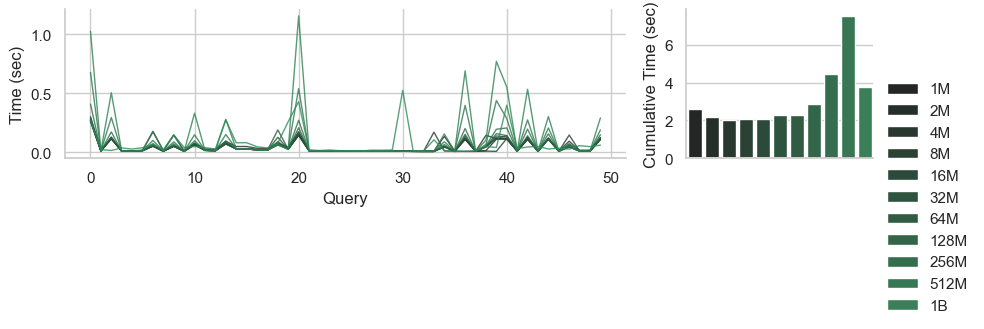

In [192]:
for exp_id in time_exps:
    j = 0
    k = 0
    dfs, names = get_experiment_dfs(exp_id)
    if(exp_id == 6):
        sorted_dataframes = sorted(dfs, key=lambda df: convert_value(df['dataset'][0]))
        plot_time(sorted_dataframes, "synthetic", exp_id)
    else:
        for i in range(0, len(dfs), len(labels[exp_id])):
            plot_time(dfs[i : i + len(exps[exp_id])], names[j % len(names)], exp_id)
            j +=1

In [186]:
from skimage import io, color
from skimage.metrics import structural_similarity as compare_ssim
import cairo

def plot(df, measure, name, width, height, queryFrom, queryTo):
    # Define the surface and the context
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
    ctx = cairo.Context(surface)
    
    ctx.set_antialias(cairo.Antialias.NONE)
    
    # Clear the background (white)
    ctx.set_source_rgb(1, 1, 1)
    ctx.paint()
    
    # Transform coordinate system so that (0,0) is the bottom left
    ctx.translate(0, height)
    ctx.scale(1, -1)
    
    # Plot the line (black)
    ctx.set_source_rgb(0, 0, 0)  # color
    ctx.set_line_width(1)  # line width
    
    pixelInterval = (queryTo - queryFrom) // width
    
    # Move to the first point
    ctx.move_to(
        np.floor((df['timestamp'].iloc[0] - queryFrom) / pixelInterval), 
        np.floor(height * ((df[measure].iloc[0] - df[measure].min()) / (df[measure].max() - df[measure].min())))
    )

    # Add lines to subsequent points
    for i in range(1, len(df)):
        ctx.line_to(
            np.floor((df['timestamp'].iloc[i] - queryFrom) / pixelInterval), 
            np.floor(height * ((df[measure].iloc[i] - df[measure].min()) / (df[measure].max() - df[measure].min())))
        )

    ctx.stroke()  # Apply the stroke
    
    # Save to a file
    surface.write_to_png(name + '.png')

    
    
def calculate_ssim(image_file1, image_file2, width, height):
    # Read the two images
    image1 = io.imread(image_file1)
    image2 = io.imread(image_file2)
    # Remove the alpha channel if present
    if image1.shape[2] == 4:
        image1 = image1[:, :, :3]
    if image2.shape[2] == 4:
        image2 = image2[:, :, :3]
    
    image1_gray = color.rgb2gray(image1)
    image2_gray = color.rgb2gray(image2)
    
    (score, _) = compare_ssim(image1_gray, image2_gray, full=True)
    # print(f"SSIM between {image_file1} and {image_file2}: {ssim_index:.4f}")
    diff = image1_gray - image2_gray
    # Search for all pixels that are different 
    # Type is <class 'numpy.ndarray'>, you can optionally convert to a list
    coords = np.argwhere(diff != 0)
    coords = coords.tolist() 
    return score, len(coords)/(width*height)


def get_mean_error(s, measures):
    a = (s.split("="))
    errs = []
    for l in a:
        if ("," in l):
            errs.append(float(l.split(",")[0]))
    errs.append(float(a[-1].split(",")[0][:-1]))
    return np.mean(errs)
    
    
def plot_indexes(dfs, name, exp_id):
    exp_name = exp_names[exp_id]
    lbls = labels[exp_id]


    fig, axs = plt.subplots(1, 1, figsize=(10, 8))

    tti_paths = [os.path.join(data, "timeQueries", db, name, "run_0", "ttiMinMaxResults") for data in exps[exp_id]]

    m4_paths = [os.path.join(data, "timeQueries", db, name, "run_0", "m4Results") for data in m4[exp_id]]

    queries = 50
    palette = sns.color_palette("tab10", n_colors=len(lbls))


    for i in range(len(dfs)):
        tti_query_0 = [os.path.join(data, "query_0") for data in tti_paths]
        sql_query_0 = [os.path.join(data, "query_0") for data in m4_paths]

        meassure_files = os.listdir(tti_query_0[0])
        measures = [x.replace(".csv", "") for x in meassure_files]   
        tti_path1 = tti_paths[i]
        m4_path = m4_paths[i]
        df1 = dfs[i]
        errors1 = df1['Error'].apply(get_mean_error, args=([measures]))
        ssims = []
        diffs = []
        for n in range(queries):
            q = f"query_{n}"
            j = 0
            ssim1 = 0
            diffs1 = 0
            for m in meassure_files:
                path_tti1 = os.path.join(tti_path1, q)
                path_sql = os.path.join(m4_path, q)

                df_tti1 = pd.read_csv(os.path.join(path_tti1, m))
                df_m4 = pd.read_csv(os.path.join(path_sql, m))

                width = int(df1['width'][0])
                height = int(df1['height'][0])
                queryFrom = int(df1['from'][i])
                queryTo = int(df1['to'][i])
                plot(df_tti1, measures[j], f"plots/{q}-{measures[j]}-tti1",width,height, queryFrom, queryTo)
                plot(df_m4, measures[j], f"plots/{q}-{measures[j]}-m4", width, height, queryFrom, queryTo)
                score1, diff1 = calculate_ssim(f"plots/{q}-{measures[j]}-tti1.png", f"plots/{q}-{measures[j]}-m4.png", width, height)

                ssim1 += score1
                diffs1 += diff1
                j+=1  
            avg_ssim1 = ssim1 / len(measures)
            avg_diff1 = diffs1 / len(measures)
            ssims.append(avg_ssim1)
            diffs.append(avg_diff1)
        
        errors1 = np.array(errors1)
        diffs = np.array(diffs)
        indices = np.where(diffs > errors1)
        diffs[indices] = errors1[indices]
        
        axs.plot(ssims, label=f"SSIM", linewidth=2.5, color=palette[i], linestyle="--", marker = "o")
        axs.plot(diffs, label=f"Difference", linewidth=2.5, color=palette[i])
        axs.plot(errors1, label=f"Max Error", linewidth=2.5, linestyle="--")
        
    # Remove spines
    sns.despine()

    # Set x-axis ticks
    axs.set_xticks([0, 10, 20, 30, 40, 50])
    # Set x-axis tick labels as 'query_{q}'
    #axs.set_xticklabels([f'{i}:{dfs[0].operation[i]}' for i in range(len(df1))], rotation=45)
        
    # Legend adjustments
    handles, l = axs.get_legend_handles_labels()
    #custom_legend = plt.legend(handles, l, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)
    custom_legend = plt.legend(handles, l, bbox_to_anchor=(0.5, -0.1, 0, 0), ncol=3, loc='lower center', frameon=False)


    plt.savefig(f'ssims/{exp_name}_{name}.png'.replace("%", ""), dpi=300)  # Adjust the filename and DPI as needed

    plt.show()

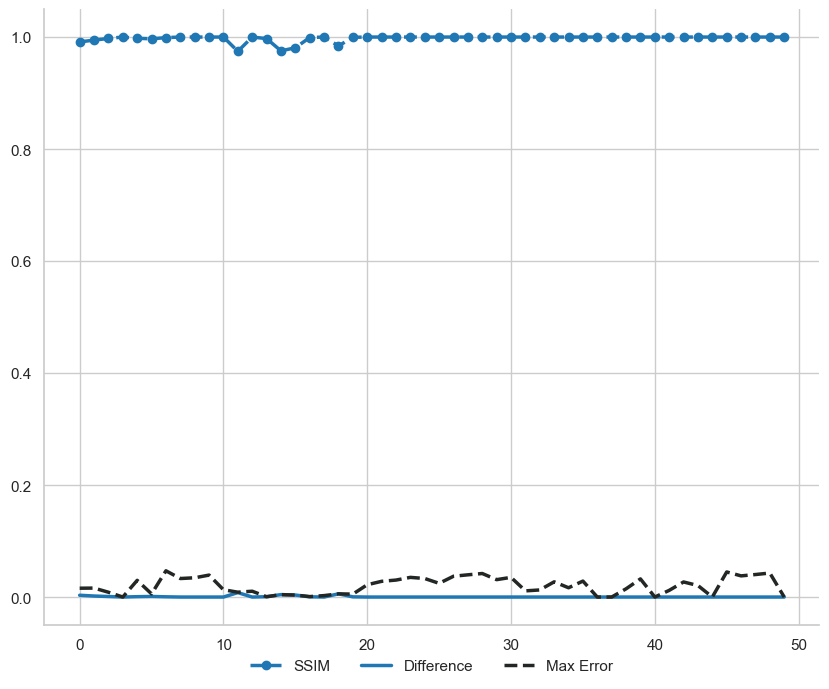

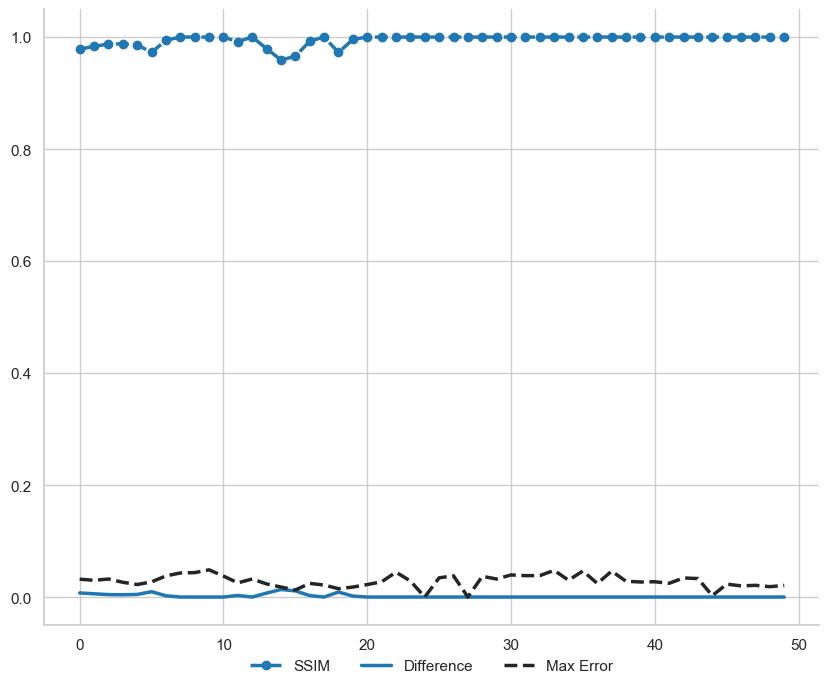

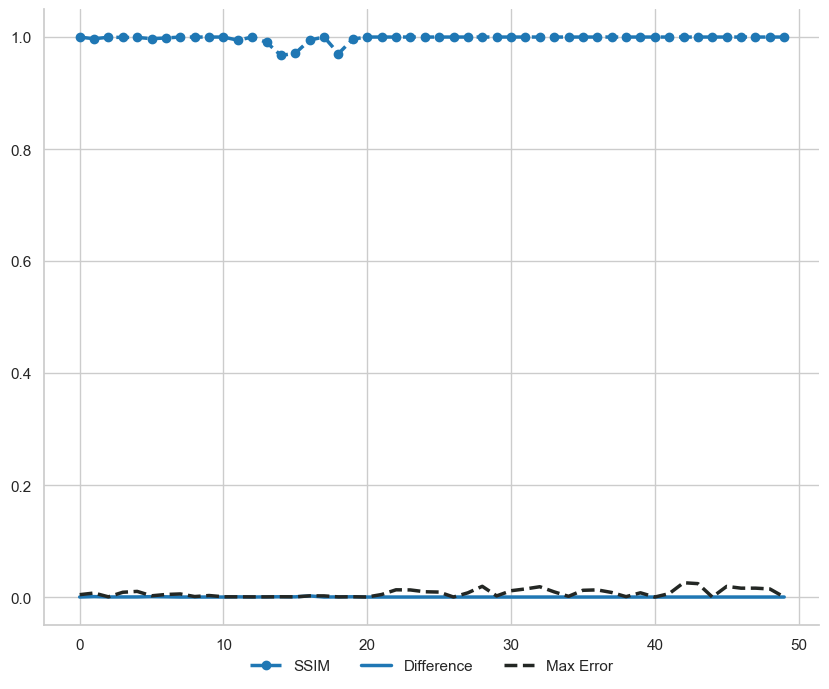

In [169]:
for exp_id in ssim_exps:
    j = 0
    k = 0
    dfs, names = get_experiment_dfs(exp_id)
    for i in range(0, len(dfs), len(labels[exp_id])):
        plot_indexes(dfs[i : i + len(exps[exp_id])], names[j % len(names)], exp_id)
        j +=1